In [84]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt



## SOBRA


In [85]:
sport_df = pd.read_excel('glossary/deportes.xlsx', names = ['word', 'rank'] , usecols = [0,1])
sport_df['class'] = 0

health_df = pd.read_excel('glossary/salud.xlsx', names = ['word', 'rank'] , usecols = [0,1])
health_df['class'] = 1

politics_df = pd.read_excel('glossary/politica.xlsx', names = ['word', 'rank'] , usecols = [0,1])
politics_df['class'] = 2

In [86]:
glossariy_df = pd.concat([sport_df, health_df, politics_df])
glossariy_df = glossariy_df.drop_duplicates(subset='word', keep = False)
glossariy_df.reset_index(drop=True, inplace=True)

In [87]:
df_list = [glossariy_df[glossariy_df['class'] == 0][:100], glossariy_df[glossariy_df['class'] == 1][:100], glossariy_df[glossariy_df['class'] == 2][:100]]

glossariy_df = pd.concat(df_list, ignore_index=True)

## --------------------------------------------------

In [88]:
train_df = pd.read_excel('./corpus/train.xlsx', usecols=[1,2])
test_df = pd.read_excel('./corpus/test.xlsx', usecols=[1,2])

1.- Poner textos de train y test procesados sin stop words en un csv anotando al aldo su clase, divididos
2.- Glosario solo con palabras y sus respectivas clses


Multinomial – It is used for Discrete Counts. The one we described in the example above is an example of Multinomial Type Naïve Bayes.
https://hands-on.cloud/implementing-naive-bayes-classification-using-python/

In [89]:
myvocabulary = list(glossariy_df['word'])

## Generacion de la matriz TF-IDF a partir del glosario extraído

In [90]:
vectorizer = TfidfVectorizer(vocabulary = myvocabulary)
x_train = vectorizer.fit_transform(train_df.iloc[:,0])
x_train = x_train.toarray()

x_test  = vectorizer.transform(test_df.iloc[:,0])
x_test = x_test.toarray()

y_train = train_df.iloc[:,1]
y_test  = test_df.iloc[:,1]


In [91]:
df_x_train = pd.DataFrame(x_train)
df_x_train.columns = myvocabulary
df_x_train

,equipos,juegos,arco,tiro,federación,balón,oro,set,brown,serbia,...,franja,socialista,fernández,ámbito,judicial,militares,responde,calvo,carmen calvo,afirmado
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.292281,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.104482,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
86,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df_y_train = train_df.iloc[:,1]
df_y_train

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: class, Length: 90, dtype: int64

In [93]:
target_names = ['Deportes', 'Salud', 'Politica']

#### Entrenamiento del modelo y obtencion de la precisión del mismo

In [94]:
def try_model(model, x_train, y_train, x_test, y_test, model_name):
    model.fit(x_train, y_train)
    predicciones = model.predict(x_test)
    print(accuracy_score(predicciones, y_test))

    #get_prediction_metrics(model, model_name, x_test) 
    get_report(predicciones, target_names, y_test, model_name)
    get_confussion_matrix(model, y_test, predicciones)
  

In [95]:
def get_prediction_metrics(model, model_name, x_test):
  predicciones_prob = model.predict_proba(x_test)
  predicciones_rounded = [np.round(x,2) for x in predicciones_prob]

  df_predicciones = pd.DataFrame(predicciones_rounded)
  df_predicciones.columns=['Deportes' 'Salud', 'Politica']
  df_predicciones.index.name = 'Documento'
  df_predicciones.to_excel(f"./resultados/Naive Bayes/predicciones-{model_name}.xlsx")
  


#### Obtención de informe sobre los reusltados de la clasificación

In [96]:
def get_report(predicciones, target_names, y_test, model_name):
  informe = classification_report(y_test, predicciones, target_names=target_names, digits=3)
  print(informe)


  informe = classification_report(y_test, predicciones, target_names=target_names, digits=3, output_dict=True)
  df_informe = pd.DataFrame(informe).transpose()

  df_informe.to_excel(f"./resultados/Naive Bayes/informe--{model_name}.xlsx", index=True)

  print(df_informe)

#### Obtención de la matriz de confusion del modelo


In [97]:
def get_confussion_matrix(model, y_test, predicciones):
  cm = confusion_matrix(y_test, predicciones, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.show()


### Multinomial Naive Bayes

0.9666666666666667
              precision    recall  f1-score   support

    Deportes      0.968     1.000     0.984        30
       Salud      0.938     1.000     0.968        30
    Politica      1.000     0.900     0.947        30

    accuracy                          0.967        90
   macro avg      0.968     0.967     0.966        90
weighted avg      0.968     0.967     0.966        90

              precision    recall  f1-score    support
Deportes       0.967742  1.000000  0.983607  30.000000
Salud          0.937500  1.000000  0.967742  30.000000
Politica       1.000000  0.900000  0.947368  30.000000
accuracy       0.966667  0.966667  0.966667   0.966667
macro avg      0.968414  0.966667  0.966239  90.000000
weighted avg   0.968414  0.966667  0.966239  90.000000


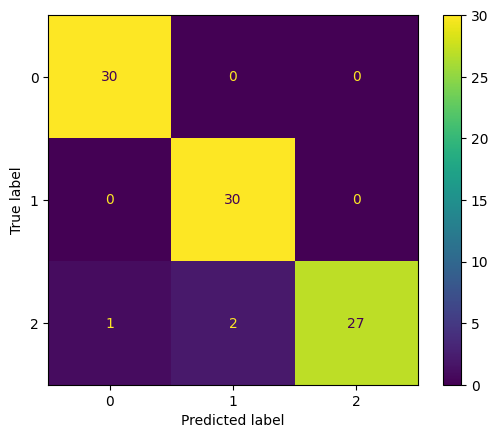

In [98]:
multinomial_naive_bayes = MultinomialNB()
try_model(multinomial_naive_bayes, x_train, y_train, x_test, y_test,'multinomial')

### Gaussian Naive Bayes

0.9444444444444444
              precision    recall  f1-score   support

    Deportes      0.935     0.967     0.951        30
       Salud      0.935     0.967     0.951        30
    Politica      0.964     0.900     0.931        30

    accuracy                          0.944        90
   macro avg      0.945     0.944     0.944        90
weighted avg      0.945     0.944     0.944        90

              precision    recall  f1-score    support
Deportes       0.935484  0.966667  0.950820  30.000000
Salud          0.935484  0.966667  0.950820  30.000000
Politica       0.964286  0.900000  0.931034  30.000000
accuracy       0.944444  0.944444  0.944444   0.944444
macro avg      0.945084  0.944444  0.944225  90.000000
weighted avg   0.945084  0.944444  0.944225  90.000000


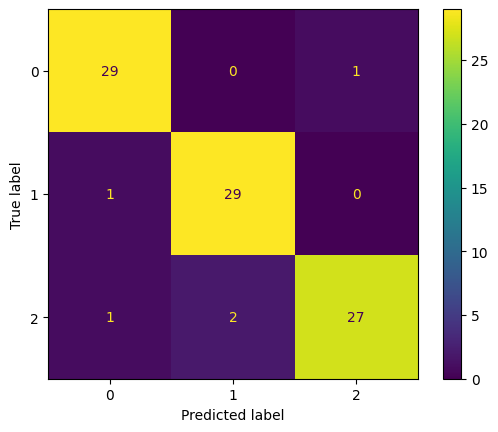

In [99]:

gaussian_naive_bayes = GaussianNB()
try_model(gaussian_naive_bayes, x_train, y_train, x_test, y_test, 'gaussiano')

### Brenouilli Naive Bayes

0.9333333333333333
              precision    recall  f1-score   support

    Deportes      1.000     0.900     0.947        30
       Salud      0.857     1.000     0.923        30
    Politica      0.964     0.900     0.931        30

    accuracy                          0.933        90
   macro avg      0.940     0.933     0.934        90
weighted avg      0.940     0.933     0.934        90

              precision    recall  f1-score    support
Deportes       1.000000  0.900000  0.947368  30.000000
Salud          0.857143  1.000000  0.923077  30.000000
Politica       0.964286  0.900000  0.931034  30.000000
accuracy       0.933333  0.933333  0.933333   0.933333
macro avg      0.940476  0.933333  0.933827  90.000000
weighted avg   0.940476  0.933333  0.933827  90.000000


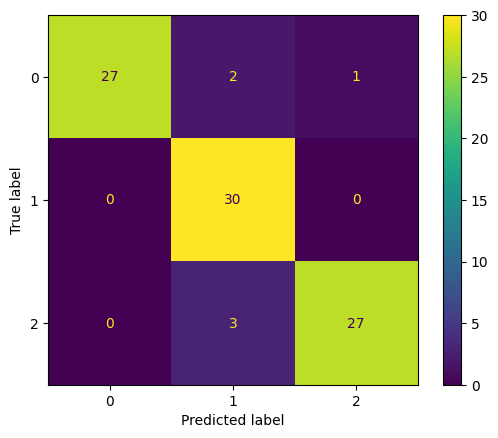

In [100]:

bernouilli_naive_bayes = BernoulliNB()
try_model(bernouilli_naive_bayes, x_train, y_train, x_test, y_test,  'brenoulli')